In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423
5,1,3.2406,5.8097
6,1,3.8128,6.3917
7,1,4.4441,6.8725
8,1,3.6747,6.7966
9,0,7.5417,4.0891


In [4]:
X_input=data[['x1','x2']]
Y_label=data[['label']]

In [5]:
import numpy as np

In [6]:
import tensorflow as tf

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
X_input

,x1,x2
0,2.6487,4.5192
1,1.5438,2.4443
2,1.8990,4.2409
3,2.4711,5.8097
4,3.3590,6.4423
5,3.2406,5.8097
6,3.8128,6.3917
7,4.4441,6.8725
8,3.6747,6.7966
9,7.5417,4.0891


In [9]:
Y_label

,label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


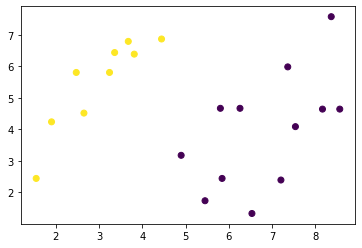

In [10]:
plt.scatter(data.x1,data.x2,c=data.label)

In [11]:
#defining the perceptron

#define placeholder for features and labels
x=tf.placeholder(tf.float32,[None,2])  # It implies 2 features
y=tf.placeholder(tf.float32,[None,1])  # Labels   

In [12]:
#first layer
#weight and bias
weight=tf.Variable(tf.truncated_normal([2,100],stddev=0.1))

bias=tf.Variable(tf.truncated_normal([100],stddev=0.1))
#input function
I=tf.add(tf.matmul(x,weight),bias)
#activation function
output=tf.nn.relu(I)

In [13]:
#second layer
#weights and bias
weight2=tf.Variable(tf.truncated_normal([100,150],stddev=0.1))
bias2=tf.Variable(tf.truncated_normal([150],stddev=0.1))
#input function
I2=tf.add(tf.matmul(output,weight2),bias2)
#activation function
output2=tf.nn.relu(I2)

In [14]:
#third layer
#weight and bias
weight3=tf.Variable(tf.truncated_normal([150,1],stddev=0.1))
bias3=tf.Variable(tf.truncated_normal([1],stddev=0.1))
#input function
I3=tf.add(tf.matmul(output2,weight3),bias3)
#activation function
output3=tf.nn.sigmoid(I3)

In [15]:
#define the cost/loss functions and the optimizer

#ind_loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output)
#loss=tf.reduce_mean(ind_loss)
loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output3))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#optimizer
gdo=tf.train.GradientDescentOptimizer(0.01)
train=gdo.minimize(loss)

In [17]:
#initiate the varaibles
init=tf.global_variables_initializer()

In [18]:
sess=tf.Session()
sess.run(init)

In [19]:
sess.run(weight)

array([[-0.04315375, -0.07137368,  0.09620976, -0.0598188 , -0.05375872,
        -0.00754571, -0.05707511, -0.0561253 ,  0.00981879, -0.00986101,
        -0.00262257,  0.10235399, -0.05953219,  0.08049785, -0.01728911,
         0.0009123 ,  0.15343216,  0.01559648,  0.11479749, -0.10626063,
        -0.04057953,  0.02202041,  0.05737508, -0.09579907,  0.14072905,
         0.13599883,  0.15813695,  0.15320162,  0.02513498,  0.01337445,
         0.14266516, -0.034675  , -0.01496853, -0.11288085, -0.06730787,
         0.19690543, -0.02034531, -0.09225072,  0.03340064,  0.03867017,
        -0.02126134,  0.06567569,  0.1011763 ,  0.00077072, -0.12588277,
         0.06337579, -0.02151143,  0.10302299,  0.06273412, -0.13893206,
        -0.07929752, -0.10407787, -0.02983042, -0.05123833, -0.00870055,
        -0.14098231,  0.157704  ,  0.04060065, -0.14000802, -0.10648499,
        -0.12366182,  0.00334587, -0.05287931,  0.01013714,  0.03958078,
        -0.0083046 ,  0.0516264 ,  0.15927623,  0.1

In [20]:
sess.run(bias)

array([ 0.0868191 , -0.06446385, -0.0694015 ,  0.04032831,  0.00626239,
        0.09657108,  0.07688476,  0.01980313, -0.08073485,  0.09059884,
        0.09187087, -0.0021132 , -0.08818052, -0.02928307, -0.08299392,
        0.12840489,  0.056218  ,  0.00269061,  0.10742319,  0.08276308,
        0.13214128,  0.11224563, -0.05364224,  0.10716819, -0.05511285,
        0.07277088,  0.07487696, -0.01779967, -0.05564898, -0.02035133,
        0.08484476, -0.0346912 , -0.17177135,  0.03461668,  0.08687788,
       -0.10274126,  0.13619421,  0.11932176,  0.10586078, -0.06630637,
        0.03252782,  0.01164722, -0.10408812,  0.02346139, -0.03039975,
        0.16945438,  0.07764942,  0.06667379,  0.10182478, -0.16940431,
       -0.07551268,  0.06028587, -0.09477323,  0.00857608, -0.02397729,
       -0.09703087,  0.01204799, -0.06517317,  0.06213447,  0.02323986,
        0.08502611, -0.11757009,  0.00972845,  0.15111476,  0.04755508,
       -0.06246397, -0.06482822,  0.00594361, -0.07200016,  0.03

In [21]:
for i in range(500):
    final_train=sess.run(train,feed_dict={x:X_input,y:Y_label})

In [22]:
sess.run(weight)

array([[-0.00798858, -0.05847822,  0.0464853 , -0.0598188 , -0.05375872,
         0.01057279, -0.05707511, -0.0561253 ,  0.00981879, -0.00986101,
         0.0412613 ,  0.17684077, -0.0582791 ,  0.16149266, -0.01728911,
        -0.04053766,  0.211425  ,  0.02733189,  0.12111431, -0.10668898,
        -0.04572474, -0.00638913, -0.01232325, -0.08170561,  0.21611111,
         0.0738795 ,  0.20583713,  0.27808544,  0.02513498,  0.01337445,
         0.22205923, -0.06480477, -0.01496853, -0.11288085, -0.08508623,
         0.2278461 , -0.01965676, -0.09225072,  0.03737106,  0.08095106,
        -0.02126134,  0.0398813 ,  0.05973269,  0.00077072, -0.12588277,
         0.05613605, -0.02685457,  0.10756584,  0.09328371, -0.15991712,
        -0.08295206, -0.08472938, -0.02983042, -0.07350403, -0.00870055,
        -0.14098231,  0.24223694,  0.03147328, -0.14000802, -0.10648499,
        -0.12366182, -0.00469935, -0.05287931, -0.04221897,  0.05458776,
        -0.02232689, -0.02104003,  0.24407995,  0.1

In [23]:
sess.run(bias)

array([ 0.08674387, -0.05735343, -0.06637385,  0.04032831,  0.00626239,
        0.09455288,  0.07688476,  0.01980313, -0.08073485,  0.09059884,
        0.08949675, -0.00468525, -0.08222675, -0.02785783, -0.08299392,
        0.13007985,  0.06232476,  0.00456259,  0.10838632,  0.08257711,
        0.1293047 ,  0.11165191, -0.04700242,  0.11215749, -0.04906462,
        0.07603265,  0.07166162, -0.02305216, -0.05564898, -0.02035133,
        0.08039533, -0.02919903, -0.17177135,  0.03461668,  0.09651115,
       -0.10248049,  0.1295086 ,  0.11932176,  0.11596685, -0.0623777 ,
        0.03252782,  0.00600542, -0.11047758,  0.02346139, -0.03039975,
        0.16682692,  0.07271913,  0.06364162,  0.10439485, -0.17601973,
       -0.07691964,  0.06713871, -0.09477323,  0.01364174, -0.02397729,
       -0.09703087,  0.01028967, -0.06680688,  0.06213447,  0.02323986,
        0.08502611, -0.11394417,  0.00972845,  0.15343975,  0.04872959,
       -0.06447634, -0.06337599,  0.00482543, -0.06723176,  0.03

In [24]:
result=sess.run(output3,feed_dict={x:X_input})

In [25]:
ypred=result.round()

In [26]:
accuracy_score(Y_label,ypred)

1.0

In [27]:
confusion_matrix(Y_label,ypred)

array([[12,  0],
       [ 0,  9]], dtype=int64)

In [28]:
# It is always a healthy practice to close the session, as it may hassle up if more number of notebooks are running in parallel
sess.close()